In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import sys
oldsysstdout = sys.stdout
class flushfile():
    def __init__(self, f):
        self.f = f
    def __getattr__(self,name): 
        return object.__getattribute__(self.f, name)
    def write(self, x):
        self.f.write(x)
        self.f.flush()
    def flush(self):
        self.f.flush()
sys.stdout = flushfile(sys.stdout)

### Train data

In [2]:
index_columns = ["Unit", "Cycle"]
settings_columns = ["setting" + str(i + 1) for i in range(3)]
sensor_columns = ["s" + str(i + 1) for i in range(21)]
final_columns = index_columns + settings_columns + sensor_columns
engine_data = pd.read_csv("/content/train_FD001.txt", header=None, sep=" ")
engine_data = engine_data[engine_data.columns[0:26]]
engine_data.columns = final_columns

engine_data

,Unit,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [3]:


engine_data.copy(deep=True).drop(['Unit'], axis=1).describe()


,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacbe36fd0>,
      dtype=object)

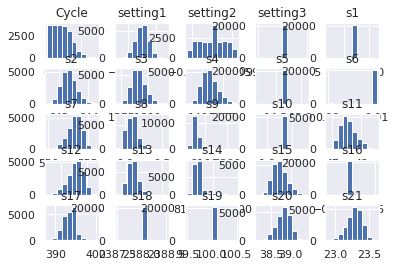

In [4]:


engine_data.copy(deep=True).drop(['Unit'], axis=1).hist()

### Test data

In [5]:
engine_data_test = pd.read_csv("/content/test_FD001.txt", header=None, sep=" ")
engine_data_test = engine_data_test[engine_data_test.columns[0:26]]
engine_data_test.columns = final_columns

engine_data_test

,Unit,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [6]:
engine_data[engine_data['Unit'] == 1].head()

,Unit,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
engine_data[engine_data['Unit'] == 1].tail()

,Unit,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,21.61,551.94,2388.31,9037.91,1.3,48.00,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,21.61,550.70,2388.27,9044.55,1.3,48.08,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,21.61,551.29,2388.29,9040.58,1.3,48.33,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,21.61,550.92,2388.28,9042.76,1.3,48.15,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,21.61,551.25,2388.32,9033.22,1.3,48.25,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649


In [8]:


def get_RUL(engine_data):
    
    last_cycle = engine_data.groupby(['Unit'])["Cycle"].max().reset_index()
    
   
    final = pd.merge(engine_data, last_cycle, how="inner", on=["Unit"])
    
   
    engine_data["RUL"] = final["Cycle_y"] - final["Cycle_x"]
    
   
    engine_data["binary_class"] = engine_data["RUL"].map(lambda x: 1 if x <= 30 else 0)
    
    
    engine_data["multi_class"] = engine_data["RUL"].map(lambda x: 2 if x <= 15 else 1 if x<= 30 else 0)
    return engine_data

train_labels = get_RUL(engine_data.copy(deep=True))
RUL_train = train_labels["RUL"]
binary_class_train = train_labels["binary_class"]
multi_class_train = train_labels["multi_class"]

train_labels

,Unit,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL,binary_class,multi_class
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4,1,2
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3,1,2
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2,1,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1,1,2


In [9]:

remaining_RUL_test = pd.read_csv("/content/RUL_FD001.txt", header=None)
remaining_RUL_test["Unit"] = remaining_RUL_test.index + 1


def get_RUL_test(engine_data_test, remaining_RUL_test):
    
    last_cycle = engine_data_test.copy(deep=True).groupby(['Unit'])["Cycle"].max().reset_index()
    
  
    final = pd.merge(last_cycle, engine_data_test.copy(deep=True), how="inner", on=["Unit", "Cycle"])
    final = pd.merge(final, remaining_RUL_test, how="inner", on=["Unit"])
    final["RUL"] = final[0]
  
    final["binary_class"] = final["RUL"].map(lambda x: 1 if x <= 30 else 0)
   
    final["multi_class"] = final["RUL"].map(lambda x: 2 if x <= 15 else 1 if x<= 30 else 0)
    return final

test_labels = get_RUL_test(engine_data_test.copy(deep=True), remaining_RUL_test)
RUL_test = test_labels["RUL"]
binary_class_test = test_labels["binary_class"]
multi_class_test = test_labels["multi_class"]

test_labels

,Unit,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,0,RUL,binary_class,multi_class
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,21.61,554.42,2388.08,9056.40,1.3,47.23,521.79,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552,112,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,21.61,553.52,2388.10,9044.77,1.3,47.67,521.74,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618,98,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,21.61,552.59,2388.16,9049.26,1.3,47.88,520.83,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740,69,69,0,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,21.61,552.64,2388.13,9051.30,1.3,47.65,521.88,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581,82,82,0,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,21.61,553.29,2388.10,9053.99,1.3,47.46,521.00,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117,91,91,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,97,-0.0006,0.0003,100.0,518.67,642.30,1590.88,1397.94,14.62,21.61,553.99,2388.03,9062.41,1.3,47.14,522.30,2388.01,8148.24,8.4110,0.03,391,2388,100.0,38.96,23.4606,137,137,0,0
96,97,134,0.0013,-0.0001,100.0,518.67,642.59,1582.96,1410.92,14.62,21.61,554.05,2388.06,9076.36,1.3,47.38,521.58,2388.06,8155.48,8.4500,0.03,395,2388,100.0,38.61,23.2953,82,82,0,0
97,98,121,0.0017,0.0001,100.0,518.67,642.68,1599.51,1415.47,14.62,21.61,553.44,2388.13,9062.34,1.3,47.66,521.53,2388.09,8146.39,8.4235,0.03,394,2388,100.0,38.76,23.3608,59,59,0,0
98,99,97,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,21.61,554.75,2388.01,9067.16,1.3,47.26,521.82,2388.02,8150.38,8.4003,0.03,391,2388,100.0,38.95,23.3595,117,117,0,0


## Exploratory Visualization

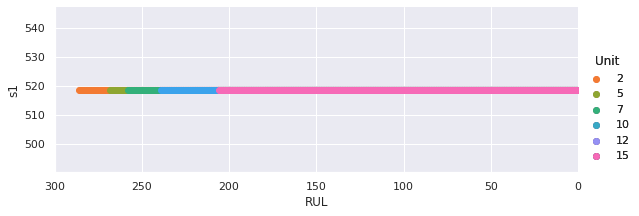

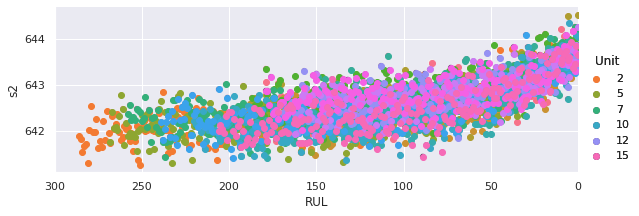

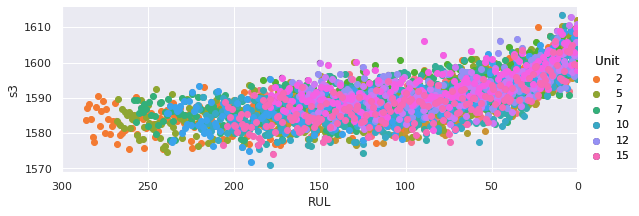

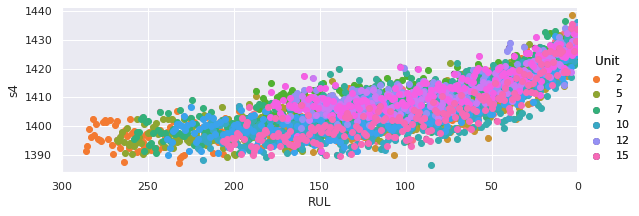

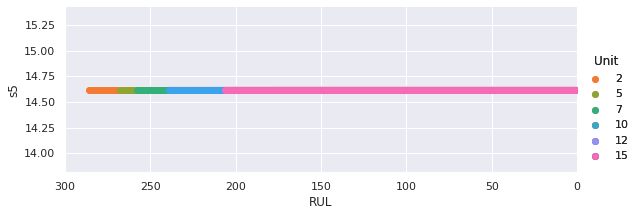

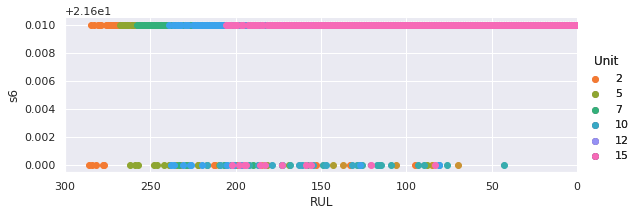

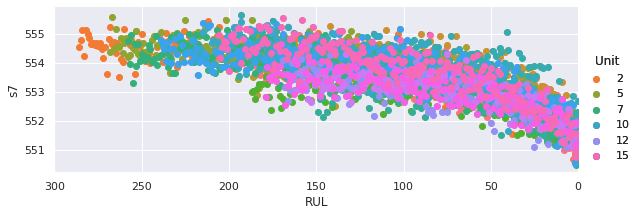

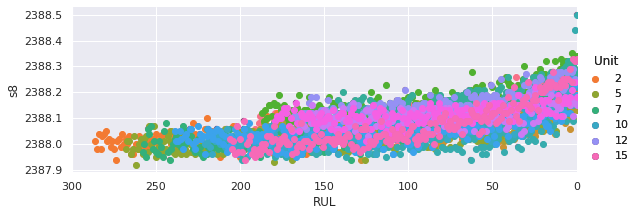

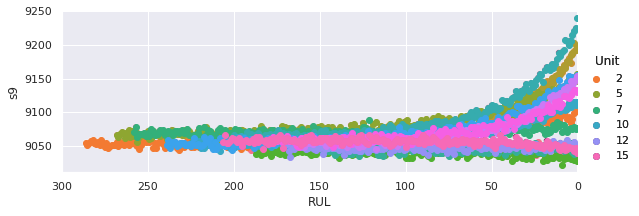

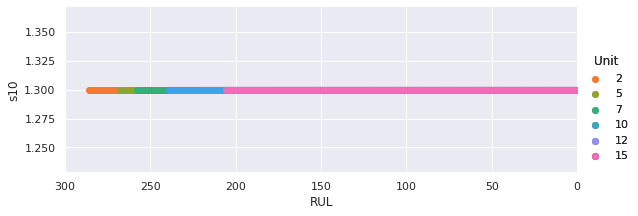

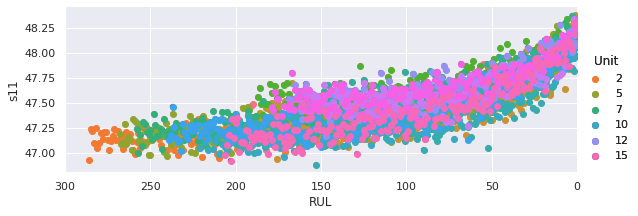

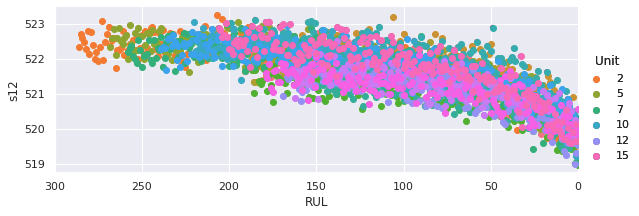

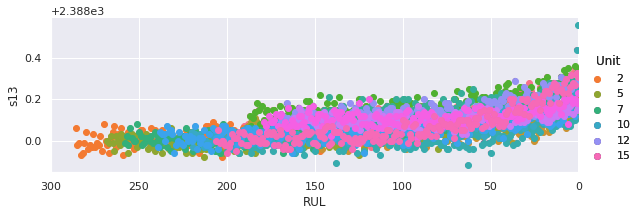

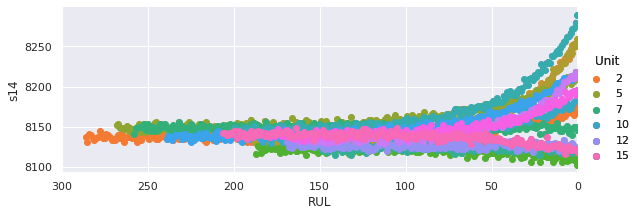

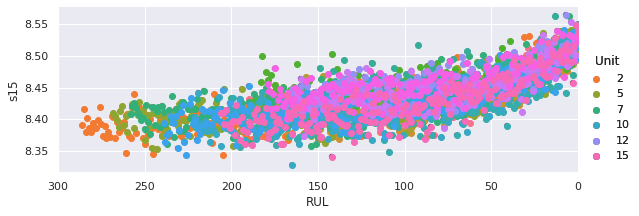

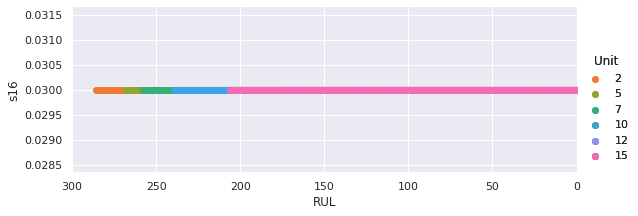

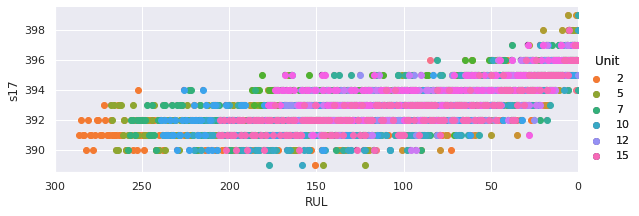

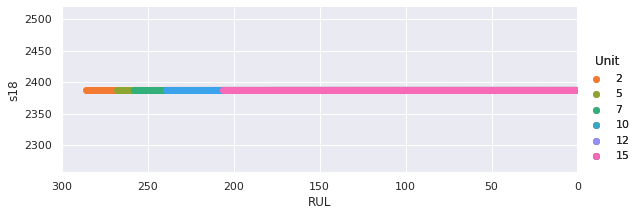

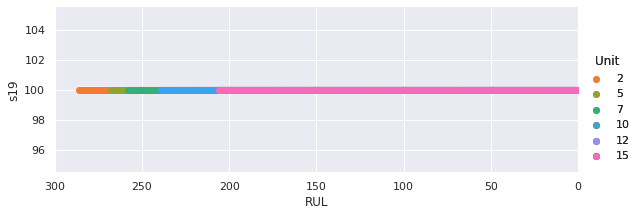

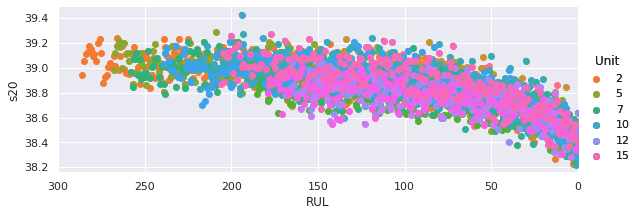

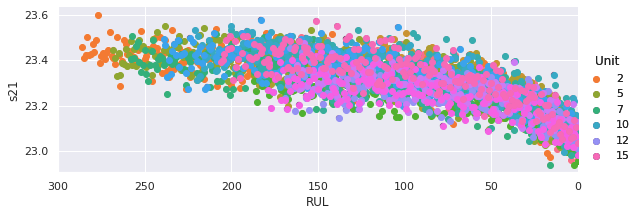

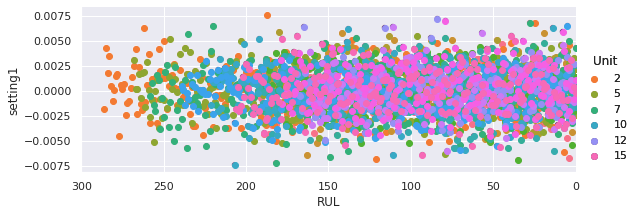

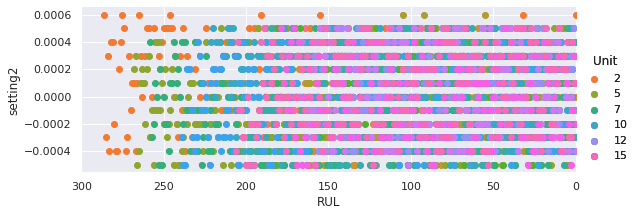

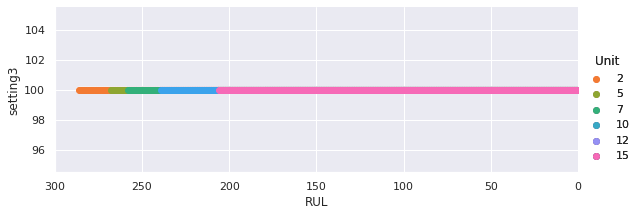

In [10]:

target_value = ['RUL']
plot_data = engine_data.copy(deep=True)
plot_data["RUL"] = RUL_train
for i in range(24):
    graph = sns.pairplot(plot_data[plot_data["Unit"] <= 15], x_vars=target_value, 
                         y_vars=(sensor_columns + settings_columns)[i], hue="Unit", size=3, aspect=2.5)
    graph = graph.map(plt.scatter)
    graph = graph.set(xlim=(300,0))
    graph = graph.add_legend()

# Feature Transformation

In [11]:


from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


features_dropped = ['Unit', 'setting1', 'setting2', 'setting3', 's1', 's5', 's10', 's16', 's18', 's19']

normalized_data = engine_data.copy(deep=True).drop(features_dropped, axis=1)

normalized_data = np.log(normalized_data)

n_components = 13


pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(normalized_data)
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension ' + str(i+1) for i in range(n_components)])

variance = pd.DataFrame(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))


last_cycle = engine_data_test.copy(deep=True).groupby(['Unit'])["Cycle"].max().reset_index()
normalized_data_test = engine_data_test.copy(deep=True)
normalized_data_test = pd.merge(last_cycle, normalized_data_test, how="inner", on=["Unit", "Cycle"])
normalized_data_test = normalized_data_test.drop(features_dropped, axis=1)

normalized_data_test = np.log(normalized_data_test)


reduced_data_test = pca.transform(normalized_data_test)
reduced_data_test = pd.DataFrame(reduced_data_test, columns=['Dimension ' + str(i+1) for i in range(n_components)])
print(reduced_data)
print(reduced_data_test)

[0.99985209 0.99994912 0.99995997 0.99996777 0.99997473 0.99998128
 0.99998759 0.99999344 0.9999985  0.99999918 0.99999958 0.99999982
 1.        ]
       Dimension 1  Dimension 2  ...  Dimension 12  Dimension 13
0         4.370439     0.018141  ...     -0.000907      0.000837
1         3.677291     0.016082  ...     -0.000274      0.000377
2         3.271852     0.010720  ...      0.000235     -0.000196
3         2.984199     0.005252  ...      0.000497      0.000044
4         2.761023     0.009637  ...      0.000100     -0.000271
...            ...          ...  ...           ...           ...
20626    -0.907802     0.020831  ...     -0.000265     -0.000025
20627    -0.912897     0.021718  ...     -0.000150     -0.000109
20628    -0.917988     0.025949  ...     -0.000396      0.000252
20629    -0.923021     0.025083  ...     -0.000795     -0.000494
20630    -0.928021     0.023308  ...      0.000101      0.000336

[20631 rows x 13 columns]
    Dimension 1  Dimension 2  ...  Dimension 1

### Predict RUL using Regression

,Mean Squared Error
RandomForest,1365.959850
Neural Network,1472.727586
Linear,1483.189040
BayesianRidge,1483.274034
Bagging,1486.274343
Huber,1524.068505
AdaBoost,1607.725024
Ridge,1748.635426
SVM,2016.208722
Lasso,2390.647345


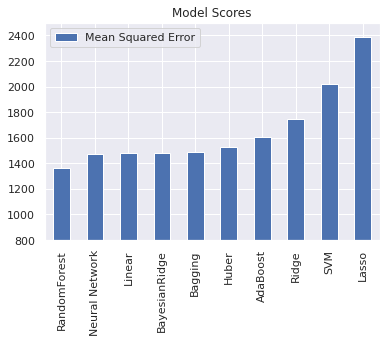

In [12]:


from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, HuberRegressor, Lasso
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR  
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor



def analyse_regression_models(train, labels):
    results = {}
    
    def test_model(clf):
        cv = KFold(n_splits=2, shuffle=True, random_state=20)
        mse = make_scorer(mean_squared_error)
        mse_val_score = cross_val_score(clf, train, labels, cv=cv, scoring=mse)
        scores = [mse_val_score.mean()]
        return scores
    
    clf = LinearRegression()
    results["Linear"] = test_model(clf)
    
    clf = Ridge()
    results["Ridge"] = test_model(clf)
    
    clf = BayesianRidge()
    results["BayesianRidge"] = test_model(clf)
    
    clf = HuberRegressor()
    results["Huber"] = test_model(clf)
    
    clf = Lasso()
    results["Lasso"] = test_model(clf)
    
    clf = MLPRegressor()
    results["Neural Network"] = test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"] = test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"] = test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"] = test_model(clf)
    
    clf = SVR()
    results["SVM"] = test_model(clf)
    
    results = pd.DataFrame.from_dict(results, orient='index')
    results.columns = ["Mean Squared Error"] 
    results = results.sort_values(by=["Mean Squared Error"], ascending=True)
    results.plot(kind="bar", title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([800, 2500])
    return results

analyse_regression_models(reduced_data, RUL_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=105, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.95, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=20, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
Mean Absolute error: 22.14606602082261
Mean Squared error: 810.2160492059371
[177.5134304  151.26056912  68.58625555  80.43942659  99.0690183
 108.14207181  93.90981999  71.08403197 147.25521502  96.90079912
 101.78496492  88.0771023   78.78641334 153.09749625 156.37937075
 114.91921673  66.89493993  56.72884489  90.75114718  21.07290928
  94.51693723 165.70655073 112.38252382  46.78503109 160.89991609
 143.09557271  91.53008804  83.91395686 100.46175117  70.89387855
  28.92404585  83.

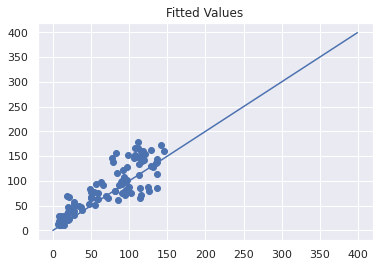

In [13]:


from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neural_network import MLPRegressor

cv = KFold(n_splits=2, shuffle=True, random_state=20)


parameters = {
    'hidden_layer_sizes': [105],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001],
    'momentum': [0.95],
    'batch_size': [100]
}


clf = MLPRegressor(random_state=20)
mse = make_scorer(mean_squared_error)


grid_obj = GridSearchCV(clf, parameters, cv=cv, scoring=mse)


grid_fit = grid_obj.fit(reduced_data, RUL_train)


best_clf = grid_fit.best_estimator_ 
print(best_clf)

best_clf.fit(reduced_data, RUL_train)

RUL_predictions = best_clf.predict(reduced_data_test)

print("Mean Absolute error: " + str(mean_absolute_error(RUL_predictions, RUL_test)))
print("Mean Squared error: " + str(mean_squared_error(RUL_predictions, RUL_test)))


plt.scatter(RUL_test, RUL_predictions)

straight_line = np.arange(0, 400)
plt.plot(straight_line, straight_line)
plt.title("Fitted Values")
print(RUL_predictions)

### Predict if an engine will fail within x cycles 



KNeighbors
SVC
GaussianProcess
GaussianNB
QuadraticDiscriminantAnalysis
Neural Network
AdaBoost
Decision Tree
RandomForest


,Accuracy
AdaBoost,0.959721
Decision Tree,0.958073
GaussianNB,0.952014
KNeighbors,0.947458
QuadraticDiscriminantAnalysis,0.944792
SVM,0.894382
RandomForest,0.888179
GaussianProcess,0.872667
Neural Network,0.850032


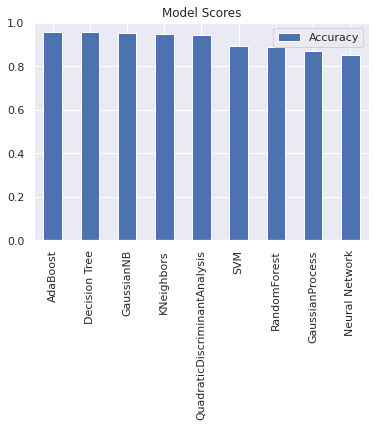

In [14]:


from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



def analyse_binary_classification_models(train, labels):
    results = {}
    
    def test_model(clf):
        cv = KFold(n_splits=2, shuffle=True, random_state=20)
        accuracy = make_scorer(accuracy_score)
        accuracy_val_score = cross_val_score(clf, train, labels, cv=cv, scoring=accuracy)
        scores = [accuracy_val_score.mean()]
        return scores
    
    clf = KNeighborsClassifier(3)
    print("KNeighbors")
    results["KNeighbors"] = test_model(clf)
    
    clf = SVC()
    print("SVC")
    results["SVM"] = test_model(clf)
    
    clf = GaussianProcessClassifier()
    print("GaussianProcess")
    results["GaussianProcess"] = test_model(clf)
    
    clf = GaussianNB()
    print("GaussianNB")
    results["GaussianNB"] = test_model(clf)
    
    clf = QuadraticDiscriminantAnalysis()
    print("QuadraticDiscriminantAnalysis")
    results["QuadraticDiscriminantAnalysis"] = test_model(clf)
    
    clf = MLPClassifier(alpha=1)
    print("Neural Network")
    results["Neural Network"] = test_model(clf)
    
    clf = AdaBoostClassifier()
    print("AdaBoost")
    results["AdaBoost"] = test_model(clf)
    
    clf = DecisionTreeClassifier(max_depth=5)
    print("Decision Tree")
    results["Decision Tree"] = test_model(clf)
    
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    print("RandomForest")
    results["RandomForest"] = test_model(clf)
    
    results = pd.DataFrame.from_dict(results, orient='index')
    results.columns = ["Accuracy"] 
    results = results.sort_values(by=["Accuracy"], ascending=False)
    results.plot(kind="bar", title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0, 1])
    return results

analyse_binary_classification_models(reduced_data, binary_class_train)

In [15]:


from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


cv = KFold(n_splits=2, shuffle=True, random_state=20)


parameters = {
    'learning_rate': [0.7, 1],
    'algorithm': ['SAMME', 'SAMME.R'],
    'n_estimators': [12, 25, 50, 100]
}


clf = AdaBoostClassifier(random_state=20)

accuracy = make_scorer(accuracy_score)


grid_obj = GridSearchCV(clf, parameters, cv=cv, scoring=accuracy)


grid_fit = grid_obj.fit(reduced_data, binary_class_train)


best_clf = grid_fit.best_estimator_ 
print(best_clf)

best_clf.fit(reduced_data, binary_class_train)

binary_class_predictions = best_clf.predict(reduced_data_test)

print("Accuracy: " + str(accuracy_score(binary_class_predictions, binary_class_test)))
print(binary_class_predictions)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.7,
                   n_estimators=50, random_state=20)
Accuracy: 0.94
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0
 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]


### Predict if an engine will fail in different time periods 


KNeighbors
SVC
GaussianProcess
GaussianNB
QuadraticDiscriminantAnalysis
Neural Network
AdaBoost
Decision Tree
RandomForest


,Accuracy
AdaBoost,0.937230
Decision Tree,0.935389
GaussianNB,0.927391
QuadraticDiscriminantAnalysis,0.919829
KNeighbors,0.919345
RandomForest,0.877029
SVM,0.857108
GaussianProcess,0.857060
Neural Network,0.850177


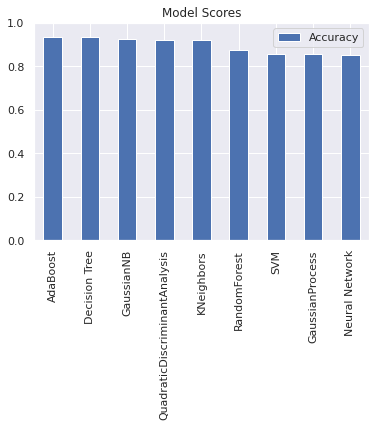

In [16]:


from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier



def analyse_multiclass_classification_models(train, labels):
    results = {}
    
    def test_model(clf):
        clf = OneVsRestClassifier(clf)
        cv = KFold(n_splits=2, shuffle=True, random_state=20)
        accuracy = make_scorer(accuracy_score)
        accuracy_val_score = cross_val_score(clf, train, labels, cv=cv, scoring=accuracy)
        scores = [accuracy_val_score.mean()]
        return scores
    
    clf = KNeighborsClassifier(3)
    print("KNeighbors")
    results["KNeighbors"] = test_model(clf)
    
    clf = SVC()
    print("SVC")
    results["SVM"] = test_model(clf)
    
    clf = GaussianProcessClassifier()
    print("GaussianProcess")
    results["GaussianProcess"] = test_model(clf)
    
    clf = GaussianNB()
    print("GaussianNB")
    results["GaussianNB"] = test_model(clf)
    
    clf = QuadraticDiscriminantAnalysis()
    print("QuadraticDiscriminantAnalysis")
    results["QuadraticDiscriminantAnalysis"] = test_model(clf)
    
    clf = MLPClassifier(alpha=1)
    print("Neural Network")
    results["Neural Network"] = test_model(clf)
    
    clf = AdaBoostClassifier()
    print("AdaBoost")
    results["AdaBoost"] = test_model(clf)
    
    clf = DecisionTreeClassifier(max_depth=5)
    print("Decision Tree")
    results["Decision Tree"] = test_model(clf)
    
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    print("RandomForest")
    results["RandomForest"] = test_model(clf)
    
    results = pd.DataFrame.from_dict(results, orient='index')
    results.columns = ["Accuracy"] 
    results = results.sort_values(by=["Accuracy"], ascending=False)
    results.plot(kind="bar", title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0, 1])
    return results

analyse_multiclass_classification_models(reduced_data, multi_class_train)

In [17]:


from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


cv = KFold(n_splits=2, shuffle=True, random_state=20)

parameters = {
    'learning_rate': [0.7, 1],
    'algorithm': ['SAMME', 'SAMME.R'],
    'n_estimators': [200, 50]
}


clf = AdaBoostClassifier(random_state=20)

accuracy = make_scorer(accuracy_score)


grid_obj = GridSearchCV(clf, parameters, cv=cv, scoring=accuracy)


grid_fit = grid_obj.fit(reduced_data, multi_class_train)


best_clf = grid_fit.best_estimator_ 
best_clf = OneVsRestClassifier(best_clf)
print(best_clf)

best_clf.fit(reduced_data, multi_class_train)

multi_class_predictions = best_clf.predict(reduced_data_test)

print("Accuracy: " + str(accuracy_score(multi_class_predictions, multi_class_test)))
print(multi_class_predictions)

OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME',
                                                 base_estimator=None,
                                                 learning_rate=0.7,
                                                 n_estimators=200,
                                                 random_state=20),
                    n_jobs=None)
Accuracy: 0.91
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 1 0 0 2 2 1 0
 0 0 1 0 2 0 0 0 0 0 0 2 0 0 1 1 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
